<a href="https://colab.research.google.com/github/ohjisu320/study_AIs/blob/main/docs/quests/NLPs/classification_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터

In [28]:
import pandas as pd
df_news = pd.read_excel('IT News.xlsx', sheet_name=None)



In [29]:
df_sheets = []
for sheet_name, df in df_news.items() :
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

len(df_sheets)

2024-01-31, <class 'pandas.core.frame.DataFrame'>
2024-01-30, <class 'pandas.core.frame.DataFrame'>
2024-01-29, <class 'pandas.core.frame.DataFrame'>
2024-01-26, <class 'pandas.core.frame.DataFrame'>
2024-01-25, <class 'pandas.core.frame.DataFrame'>
2024-01-24, <class 'pandas.core.frame.DataFrame'>
2024-01-23, <class 'pandas.core.frame.DataFrame'>
2024-01-22, <class 'pandas.core.frame.DataFrame'>
2024-1-19, <class 'pandas.core.frame.DataFrame'>
2024-1-18, <class 'pandas.core.frame.DataFrame'>
2024-1-17, <class 'pandas.core.frame.DataFrame'>
2024-1-16, <class 'pandas.core.frame.DataFrame'>
2024-1-15, <class 'pandas.core.frame.DataFrame'>
2024-1-12, <class 'pandas.core.frame.DataFrame'>
2024-1-11, <class 'pandas.core.frame.DataFrame'>
2024-1-10, <class 'pandas.core.frame.DataFrame'>
2024-1-9, <class 'pandas.core.frame.DataFrame'>
2024-1-8, <class 'pandas.core.frame.DataFrame'>
2024-1-5, <class 'pandas.core.frame.DataFrame'>
2024-1-4, <class 'pandas.core.frame.DataFrame'>
2024-01-03, <cla

45

In [30]:
df_sheets[0].columns[0]

'이름'

In [31]:
# 이름으로 컬럼이름 통일
for x in df_sheets :
  print(x.columns)
  if x.columns[0] != '이름' :
    x.rename(columns = {f'{x.columns[0]}':'이름'}, inplace=True)
    pass

Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['ㅋ', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['ㅋㅋㅋㅋㅋㅋㅋ', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명', '문장 요약', '한 줄평'], dtype='object')
Index(['이름', '선호도 투표', '뉴스명'

In [32]:
# 내가 작성한 뉴스명 기준
# sentences = []
# for sheet in df_sheets:
#   try:
#     sentences.append(sheet.query("이름=='오지수'")['뉴스명'].dropna().values[0])
#   except:
#     pass
#   pass
# sentences


# 전체 뉴스명 기준
sentences = []
for sheet in df_sheets:
  try:
    sentences.append(sheet['뉴스명'].dropna().values[0])
  except:
    pass
  pass
sentences =

['개보위 "맞춤형 광고 개인정보 처리 투명성 높인다"',
 '정보공개청구, 이제 AI가 돕는다…내용요약·처리방향까지 ‘척척’',
 '테슬라, 해킹 대회서 또 뚫렸다',
 '돌봄로봇이 협심증으로 쓰러진 70대 입주민 신고해 구조',
 '브이캣, SSG닷컴에 ‘영상 및 배너 제작 AI 솔루션’ 공급',
 '스마트폰 AI 경쟁 신호탄 쏜 갤럭시…유료화 가능성은',
 "韓 메타버스, 세계진출 vs 구조조정 '갈림길' [메타버스의 명암 中]",
 'KOSA , SW분야 근로자 역량 강화 프로그램 실시',
 '비트코인 시세 급락···한때 4만1000달러대 붕괴',
 '오늘은 패스',
 '플랫폼 강화 나선 위믹스...거버넌스 확보에 나이트크로우까지',
 "韓, '가상자산' ETF도 갈라파고스 되나",
 '부산경제 올해 블록체인으로 새 활력 기대',
 '금융위 “韓증권사, 비트코인 현물 ETF 중개 안돼”',
 "美 SEC, '비트코인 현물 ETF' 마침내 승인",
 '“이거 먹으면 배 안 고파, 게다가 저렴해”… MIT, 위(胃)에서 진동해 식욕 떨어뜨리는 다이어트 캡슐 개발',
 '비트코인, 2년 만에 4만7천 달러 돌파',
 '"생성 AI, 3년 뒤 전통 마케팅 업무 30% 대신할 것"',
 '게임사는 AI를 어떻게 활용할까',
 '국세청, 가상화폐 관련 위메이드에 537억 원 추징',
 '[CES 2024] SK하이닉스, AI 인프라 기술력 뽐낸다…CXL⋅CMS 등 전시',
 '"AI 모니터링, 얼굴인식 솔루션까지" 새해 보안업계 트렌드는?',
 'https://www.dailian.co.kr/news/view/1329153/?sc=Naver',
 '국내 제약바이오, ‘저조한’ AI 신약 개발 경쟁력…해법은?',
 '[비상경제장관회의] 국가통합 바이오 빅데이터 4월 개시…감염병·재생의료 R&D 강화',
 '제약·바이오社 "AI신약개발, 뭉쳐야 산다"',
 '쓰리빅스, 바이오 빅데이터 분석 플랫폼 ‘3X-INSIGHTS’ 출시',
 "유튜브에 밀려난 카카오톡, '국민

In [33]:
!pip install konlpy

In [34]:
# Okt 사용
from konlpy.tag import Okt
okt = Okt()

In [95]:
# 조사, 어미, 구두점 제거
import re
def okt_clean(sentences):
  sentence_list = []
  for sentence in sentences :
    clean_text = []
    for word in okt.pos(sentence, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation','URL']:
            clean_text.append(word[0])
            pass
    sentence_list.append(" ".join(clean_text))
  return sentence_list

In [96]:
sentences_list = okt_clean(sentences)
sentences_list

['개 보위 맞춤 형 광고 개인정보 처리 투명 성 높이다',
 '정보공개 청구 이제 AI 가다 돕다 내용 요약 처리 방향 ‘ 척척',
 '테슬라 해킹 대회 또 뚫리다',
 '돌보다 로봇 협심증 쓰러지다 70 대다 입 주민 신고 하다 구조',
 '브이 캣 SSG 닷 컴 ‘ 영상 및 배너 제작 AI 솔루션 공급',
 '스마트폰 AI 경쟁 신호탄 쏘다 갤럭시 유료 화 가능성',
 '韓 메타 버스 세계 진출 vs 구조조정 갈림길 메타 버스 명암 中',
 'KOSA SW 분야 근로자 역량 강화 프로그램 실시',
 '비트코인 시세 급락 한때 4만 1000달러 대 붕괴',
 '오늘 패스',
 '플랫폼 강화 나선 위 믹스 거버넌스 확보 나이트 크로우',
 '韓 가상 자산 ETF 도 갈라파고스 되다',
 '부산 경제 올해 블록 체인 새 활 력 기대',
 '금융위 “韓 증권사 비트코인 현물 ETF 중개 안 돼다 ”',
 '美 SEC 비트코인 현물 ETF 마침내 승인',
 '“ 이 거 먹다 배 안 고프다 게다가 저렴하다 ” MIT 위 胃 진동 하다 식욕 떨어뜨리다 다이어트 캡슐 개발',
 '비트코인 2년 4만 7천 달러 돌파',
 '생 성 AI 3년 뒤 전통 마케팅 업무 30% 대신 하다 것',
 '게임 살다 AI 를 어떻다 활용 하다',
 '국세청 가상 화폐 관련 위메이드 537억 원 추징',
 'CES 2024 SK 하이닉스 AI 인프라 기술 력 뽐내다 CXL ⋅ CMS 등 전시',
 'AI 모니터링 얼굴인식 솔루션 새해 보안 업계 트렌드',
 '',
 '국내 제약 바이오 ‘ 저조하다 AI 신약 개발 경쟁력 해법',
 '비상 경제 장관 회의 국가 통합 바이오 빅데이터 4월 개시 감염병 재생 의료 R D 강화',
 '제약 바이오 社 AI 신약 개발 뭉치다 산다',
 '쓰리다 빅스 바이오 빅데이터 분석 플랫폼 ‘ 3 X INSIGHTS 출시',
 '유튜브 밀리다 카카오 톡 국민 앱 탈환 하다 수 있다 IT',
 '챗 GPT 답변 내 정보 노출 안되다 정부 데이터 사용 기준 마련'

## 모델

In [97]:
file_path = 'tfidfVectorizer.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  loaded_model_vector = pickle.load(pickle_file)

In [98]:
# Tokenizing
sentence_tokens = loaded_model_vector.transform(sentences_list) # 학습 형식 그대로 이용
sentence_tokens

<44x27288 sparse matrix of type '<class 'numpy.float64'>'
	with 306 stored elements in Compressed Sparse Row format>

In [99]:
file_path = 'NLP_classfication_ynanewstitles.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  loaded_model_cate = pickle.load(pickle_file)

In [100]:
# 예측
predict_cate = loaded_model_cate.predict(sentence_tokens.toarray())
predict_cate

array([2., 0., 0., 0., 0., 0., 1., 2., 4., 2., 2., 1., 3., 1., 2., 0., 1.,
       0., 0., 1., 0., 0., 2., 0., 4., 0., 0., 0., 6., 6., 2., 2., 2., 1.,
       0., 0., 4., 0., 0., 1., 0., 0., 2., 0.])

In [101]:
df_topic = pd.read_csv('topic_dict.csv')
df_topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [102]:
predict_topic = []
for x in predict_cate :
  topic = df_topic.query(f"topic_idx=={x}")['topic'].values[0]
  predict_topic.append(topic)
predict_topic

['사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 '사회',
 '세계',
 '사회',
 '사회',
 '경제',
 '생활문화',
 '경제',
 '사회',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 '세계',
 'IT과학',
 'IT과학',
 'IT과학',
 '정치',
 '정치',
 '사회',
 '사회',
 '사회',
 '경제',
 'IT과학',
 'IT과학',
 '세계',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학']

In [103]:
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [104]:
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [105]:
from collections import Counter
noun_count = Counter(predict_topic)
noun_count

Counter({'사회': 10, 'IT과학': 21, '경제': 7, '세계': 3, '생활문화': 1, '정치': 2})

## WordCloud

In [106]:
wordCloud.generate_from_frequencies(noun_count)

In [107]:
wordCloud.words_

{'IT과학': 1.0,
 '사회': 0.47619047619047616,
 '경제': 0.3333333333333333,
 '세계': 0.14285714285714285,
 '정치': 0.09523809523809523,
 '생활문화': 0.047619047619047616}

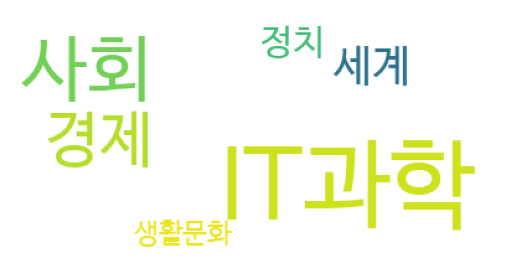

In [108]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()